## Temperature Dependence Analysis

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fileT = 'Temp-Dependence-Study.csv'

In [43]:
df = pd.read_csv(fileT)
df.head()

,Temp [K],Filter,FWHM_0,FWHM_1,Mean_0,Mean_1,Alpha,SNR
0,90,0.3,5.24,21.86,533.40,541.4,0.06,3.0
1,100,0.3,5.90,21.20,531.80,538.3,1.50,2.3
2,120,0.3,6.80,23.40,530.46,535.2,1.40,4.0
3,140,0.3,8.06,24.62,529.47,532.6,3.00,2.0
4,160,0.3,10.20,35.40,528.50,531.3,2.10,1.5


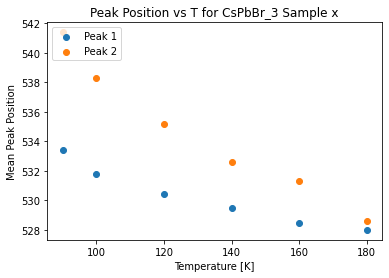

In [98]:
# Plot mean peak position as function of temp
# for the two gaussians. Expect linear relationship
fig = plt.figure()
ax = fig.add_subplot()

m0, b0 = np.polyfit(df['Temp [K]'],df['Mean_0'], deg=1)
m1,b1 = np.polyfit(df['Temp [K]'],df['Mean_1'],deg=1)
xseq = np.linspace(90, 180, num=100)

ax.scatter(df['Temp [K]'],df['Mean_0'],label="Peak 1")
ax.scatter(df['Temp [K]'],df['Mean_1'],label="Peak 2")
#ax.plot(xseq, b0 + m0 * xseq, color="blue", lw=1.5,label=m1)
#ax.plot(xseq, b1 + m1 * xseq, color="orange", lw=1.5,label=m2)

ax.set_xlabel('Temperature [K]')
ax.set_ylabel('Mean Peak Position')
ax.set_title("Peak Position vs T for CsPbBr_3 Sample x")
ax.legend(loc=2)

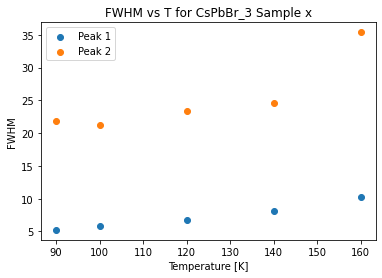

In [97]:
# Plot FWHM as function of temp
# Plot mean peak position as function of temp
# for the two gaussians. Expect linear relationship
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df['Temp [K]'][:5],df['FWHM_0'][:5],label="Peak 1")
ax.scatter(df['Temp [K]'][:5],df['FWHM_1'][:5],label="Peak 2")


ax.set_xlabel('Temperature [K]')
ax.set_ylabel('FWHM')
ax.set_title("FWHM vs T for CsPbBr_3 Sample x")
ax.legend(loc=2)

We aim to fit the data above using $\omega(T) = \frac{A}{exp(E_p/K_BT)-1}+C$ to determine $E_p$, the energy of the phonon.

[114.053   0.251   4.961]


Text(0, 0.5, 'FWHM')

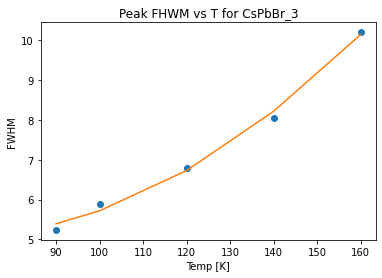

In [100]:
from scipy.optimize import curve_fit

# TODO - convert to eV and rescale
# Issue with overflow using K_B true values
#K_B = 1.38*6.23*10**(-10) # in eV/K
K=0.0005
def Toyozawa(T,A,E_p,C):
    exp = np.exp(E_p/(K*T))
    omega = (A/(exp-1))+C
    return omega

guess = [0.2, 0.015,0.02]
parameters, covariance = curve_fit(Toyozawa, df['Temp [K]'][:5], df['FWHM_0'][:5], p0=guess)
fit_A = parameters[0]
fit_Ep = parameters[1]
fit_C = parameters[2]
print(parameters)

fit = Toyozawa(df['Temp [K]'][:5], fit_A, fit_Ep,fit_C)

plt.plot(df['Temp [K]'][:5], df['FWHM_0'][:5], 'o', label='data')
plt.plot(df['Temp [K]'][:5], fit, '-', label='fit')
plt.title("Peak FHWM vs T for CsPbBr_3")
plt.xlabel("Temp [K]")
plt.ylabel("FWHM")

TODO - Add thermal quenching model analysis

In [101]:
def thermal_quenching(T,E1,E2,C1,C2,I_0):
    return I_0/(1+C1*np.exp(-E1/(K*T))+C2*np.exp(-E2/(K*T)))

## Power Dependence Analysis

In [15]:
fileP = 'Power-Dependence-Study.csv'
df = pd.read_csv(fileP)
df.head()

,Filter,Amplitude_0,Amplitude_1
0,0.3,22708.5,9877.3
1,0.6,6448.4,2560.9
2,0.9,1050.0,550.0
3,1.2,320.0,180.0


Slope (alpha) for Peak 1: 2.11
Slope (alpha) for Peak 2: 1.96


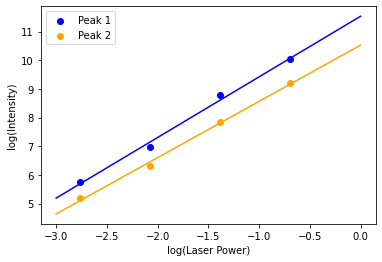

In [36]:
# Determine laser intensity through each filter
# using P = I_0 * 10**-(ND) and plot against
# amplitude on logarithmic scale

I_0 = 1 # check in lab
powers = I_0 * 10**-(df['Filter'])

# Fit linear regression via least squares
m0, b0 = np.polyfit(np.log(powers),np.log(df['Amplitude_0']), deg=1)
m1,b1 = np.polyfit(np.log(powers),np.log(df['Amplitude_1']),deg=1)
xseq = np.linspace(-3, 0, num=100)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(np.log(powers),np.log(df['Amplitude_0']),label="Peak 1",color="blue")
ax.scatter(np.log(powers),np.log(df['Amplitude_1']),label="Peak 2",color="orange")
ax.plot(xseq, b0 + m0 * xseq, color="blue", lw=1.5)
ax.plot(xseq, b1 + m1 * xseq, color="orange", lw=1.5)

ax.set_xlabel('log(Laser Power)')
ax.set_ylabel('log(Intensity)')
ax.legend(loc=2)

print("Slope (alpha) for Peak 1:",np.around(m0,2))
print("Slope (alpha) for Peak 2:",np.around(m1,2))